**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ matplotlib 3.0.2
+ sklearn 0.20.2

# Sklearn

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.o

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [3]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

In [8]:
len(data) 

100

In [18]:
data#[:,1]

array([[-1.13431848e+00, -7.07420888e-01],
       [-2.76179492e-01, -5.16883894e-01],
       [-4.62005348e-01,  3.50888494e-01],
       [ 3.65053516e-01,  7.74082033e-01],
       [-1.02141473e+00,  4.32395701e-01],
       [-3.13508197e-01,  7.71011738e-01],
       [-4.54227855e-01,  5.14370717e-01],
       [-4.16757847e-01, -5.62668272e-02],
       [-1.25542722e+00,  9.38163671e-01],
       [ 1.00036589e+00, -3.81092518e-01],
       [-1.73795950e+00,  1.04082395e+00],
       [-1.54667461e+00, -2.08265194e+00],
       [ 2.04207979e-01,  1.40669624e+00],
       [-2.13619610e+00,  1.64027081e+00],
       [ 4.33496330e-01,  1.27837923e+00],
       [-4.68346260e-01, -1.25472031e+00],
       [-2.69056960e-01,  2.23136679e+00],
       [-3.25049628e-01, -5.60234506e-01],
       [-9.02246068e-01, -5.90972275e-01],
       [-1.41881055e+00, -2.51774118e-01],
       [ 6.95119605e-01, -2.03346655e+00],
       [-1.09873895e+00,  1.58448706e+00],
       [-6.53250268e-01,  8.42456282e-01],
       [ 3.

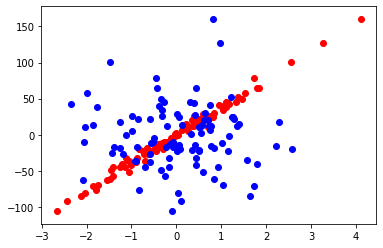

In [19]:
pylab.scatter(data[:,0], target, color = 'r')
pylab.scatter(data[:,1], target, color = 'b')

In [21]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [22]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [23]:
print(test_labels)

[-22.33224966 126.64909941 -63.4056294  -57.46293828 -71.3715844
 -26.87743177  13.02656201  25.24428409   4.45578287 -27.02798161
  24.82763821 -45.38589148  38.36241814  12.74038341 -37.31870104
 -76.75213382  22.2276832  -22.64686884 -19.36956003 -14.97110322
  44.66274342   5.86887774 160.09441244 -84.32102748  39.70663436
 -16.65927231 -44.51417742  23.87701013  49.41686419 -32.92158843]


In [24]:
print(predictions)

[-29.10332089 125.62599041 -60.59472813 -54.92139102 -71.29768346
 -28.25730341  18.68100287  14.60847882   8.96111769 -25.38620279
  30.70368544 -44.21340131  41.30025958   7.0433009  -35.27205189
 -69.52500725  18.42067697 -17.63839883 -32.18378811 -12.67076409
  50.8500511    4.65098263 157.32472718 -81.60888294  37.71740241
 -14.78740382 -54.97205392  31.67553979  55.64219367 -34.16345102]


In [25]:
metrics.mean_absolute_error(test_labels, predictions)

4.279892429291491

In [26]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring = 'neg_mean_absolute_error', 
                                                  cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779698, std: 1.073710449289019


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; f

In [27]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [28]:
scorer

make_scorer(mean_absolute_error)

In [29]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779698, std: 1.073710449289019


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; f

In [30]:
coef

array([38.07925837,  0.        ])

In [31]:
linear_regressor.coef_

array([38.31612563,  0.42279267])

In [32]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.4516194498923889

In [33]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [34]:
print("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 38.32*x1 + 0.42*x2 + -0.45


#### Lasso

In [35]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [36]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.154478246666397, std: 1.0170354384993354


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; f

In [37]:
print(lasso_regressor.coef_)

[37.21757753  0.        ]


In [38]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [39]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1]))

y = 37.22*x1 + 0.00*x2
